In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
#reading data
data = pd.read_csv('data_co_lab_engineering_dataset.csv')

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Analysis

Text(0, 0.5, 'Number')

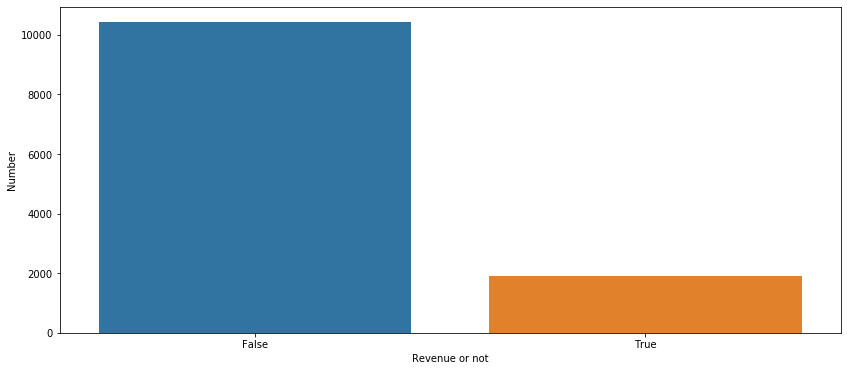

In [4]:

plt.figure(figsize=(14,6))
sns.countplot(data['Revenue'])
plt.xlabel('Revenue or not')
plt.ylabel('Number')

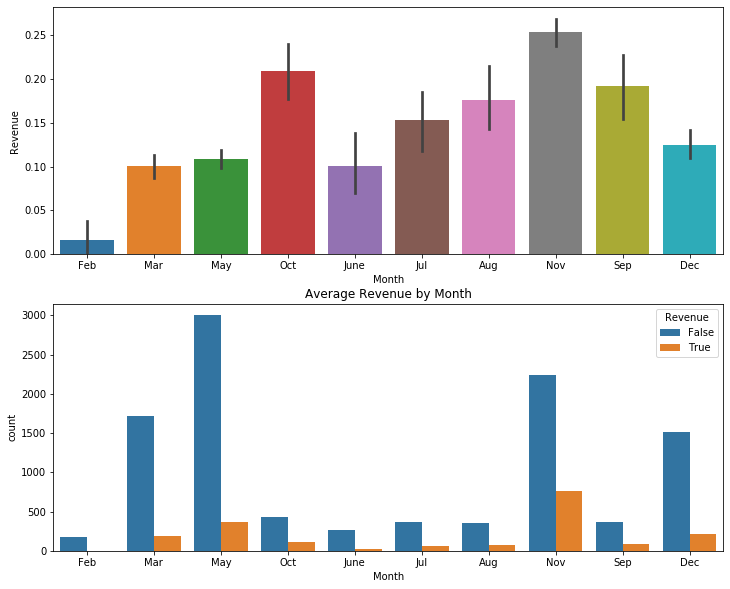

In [5]:
f,axe=plt.subplots(2,1,figsize=(12,10))
# Add title
plt.title("Average Revenue by Month")

# Bar chart showing average Revenue by month
sns.barplot(x=data['Month'], y=data['Revenue'],ax=axe[0])

# Add label for vertical axis
plt.ylabel("Revenue")

sns.countplot(data["Month"],hue=data["Revenue"],ax=axe[1])

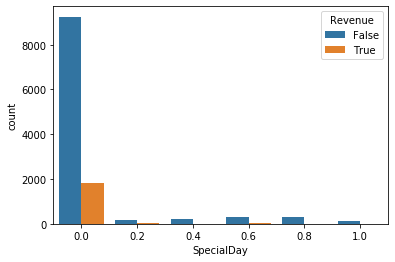

In [6]:
sns.countplot(data["SpecialDay"],hue=data["Revenue"])

Text(0, 0.5, 'Revenue')

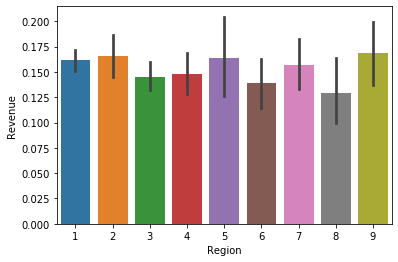

In [7]:

# Bar chart showing average Revenue by region
sns.barplot(x=data['Region'], y=data['Revenue'])

# Add label for vertical axis
plt.ylabel("Revenue")

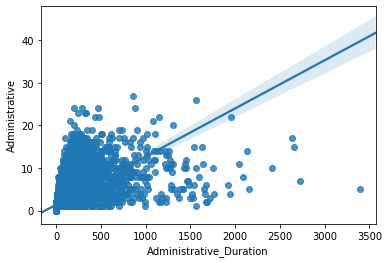

In [8]:
sns.regplot(x=data['Administrative_Duration'], y=data['Administrative'])

# Data Cleaning and preprocessing

In [9]:
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]
cols_with_missing

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates']

In [10]:
cols_without_missing = [col for col in data.columns
                     if not data[col].isnull().any()]
cols_without_missing

['PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [11]:
from sklearn.impute import SimpleImputer
# Imputation
my_imputer = SimpleImputer()
imputed_data = pd.DataFrame(my_imputer.fit_transform(data[cols_with_missing]))
# Imputation removed column names; put them back
imputed_data.columns = cols_with_missing

In [12]:
data = pd.concat([data[cols_without_missing], imputed_data], axis = 1)

In [13]:
data.head()

,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20
1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10
2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20
3,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14
4,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05


In [14]:
#dealing with categorical values 

In [15]:
#coverting weekend boolean values to 1 0 : 
new_coloumn=[]
for weekend_value in data['Weekend']:
    if not weekend_value: 
        new_coloumn.append(0)
    else:
        new_coloumn.append(1)
data['Weekend']=new_coloumn

In [16]:
#coverting Revenue boolean values to 1 0 : 
new_coloumn=[]
for Revenue_value in data['Revenue']:
    if not Revenue_value: 
        new_coloumn.append(0)
    else:
        new_coloumn.append(1)
data['Revenue']=new_coloumn

In [17]:
data.head()

,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20
1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10
2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20
3,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14
4,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05


In [18]:
#dealing with visitor type and month using one hot encoder
object_cols=['VisitorType','Month']
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols= pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))

# One-hot encoding removed index:
OH_cols.index = data.index
# Remove categorical columns (will replace with one-hot encoding)
num_data = data.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_data = pd.concat([num_data, OH_cols], axis=1)

In [19]:
OH_data.dtypes

PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Weekend                      int64
Revenue                      int64
Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
0                          float64
1                          float64
2                          float64
3                          float64
4                          float64
5                          float64
6                          float64
7                          float64
8                          float64
9                          float64
10                         float64
11                         float64
12                  

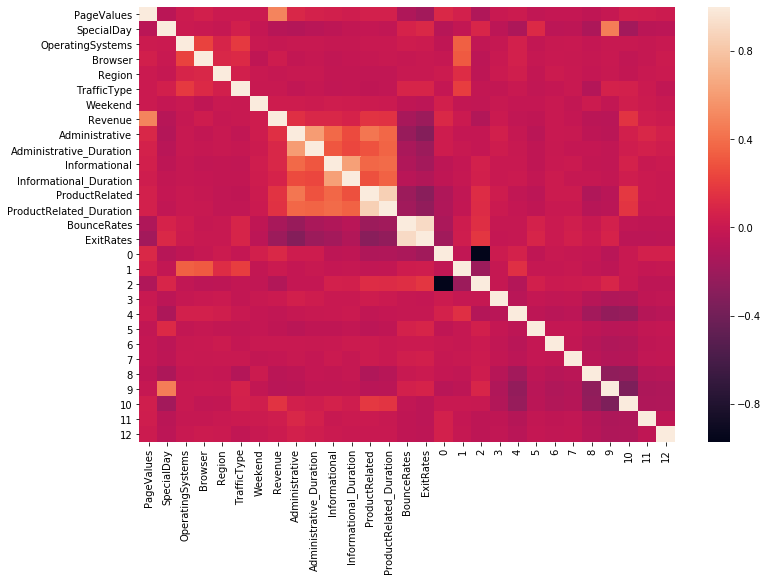

In [20]:
plt.figure(figsize=(12,8))
corr = OH_data.corr()
sns.heatmap(corr)

In [21]:
for col in OH_data.columns:
    if ((corr.loc[col,'Revenue'] >= 0.9) or (corr.loc[col,'Revenue']<=-0.9)) and (col!='Revenue'):
        print(col)
        

In [22]:
X=OH_data.drop('Revenue',axis=1)
Y=pd.DataFrame(data['Revenue'],columns=['Revenue'])

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=32)

# Training and testing some machine learning models

# Naive Bayes Model


In [178]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
model_nb=nb.fit(X_train,Y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [179]:
Y_pred=model_nb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7992700729927007

# Random Forest Classifier GridSearchCV

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [10,100,300, 500],
    'max_depth' : [10,30,60,90],   
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
gs_rfc_fit = CV_rfc.fit(X_train, Y_train)


In [181]:
gs_rfc_fit.best_params_


{'max_depth': 10, 'n_estimators': 500}

In [26]:
rfc_model=RandomForestClassifier(random_state=42, n_estimators= 500, max_depth=10)

In [27]:
rfc_model.fit(X_train, Y_train)


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
pred=rfc_model.predict(X_test)

In [29]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(Y_test,pred))


Accuracy for Random Forest on CV data:  0.907948094079481


# gradient boosting model with GridSearchCV


In [186]:
from sklearn.ensemble import GradientBoostingClassifier

In [189]:
gbc = GradientBoostingClassifier()
param_grid = { 
    'n_estimators': [150,300],
    'max_depth' : [10,30], 
    'learning_rate': [0.01,0.1],
}

CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1,verbose=1)
gs_gbc_fit = CV_gbc.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.7min finished
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
gs_gbc_fit.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}

In [191]:
gbc_model=GradientBoostingClassifier(random_state=42, n_estimators= 150, max_depth=10,learning_rate=0.1)

In [192]:
gbc_model.fit(X_train,Y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [193]:
pred=gbc_model.predict(X_test)

In [194]:
print("Accuracy for Gradient Boosting Classifier on CV data: ",accuracy_score(Y_test,pred))


Accuracy for Gradient Boosting Classifier on CV data:  0.9034874290348743


# KNN Classifier with GridSearchCV

In [195]:
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier()
param_grid = { 
    'n_neighbors': [3,5,9,19],
    'weights' : ['uniform','distance'], 
    'metric': ['euclidean','manhattan']
}

CV_KNNC = GridSearchCV(estimator=KNNC, param_grid=param_grid, cv=5, n_jobs=-1,verbose=1)
gs_KNNC_fit = CV_KNNC.fit(X_train, Y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.0s finished
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [196]:
gs_KNNC_fit.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

In [197]:
KNNC_model = KNeighborsClassifier(n_neighbors=9,metric='euclidean',weights='distance')

In [198]:
KNNC_model.fit(X_train,Y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [199]:
pred=KNNC_model.predict(X_test)

In [200]:
print("Accuracy for KNN Classifier : ",accuracy_score(Y_test,pred))

Accuracy for KNN Classifier :  0.8592862935928629


# Support vector machine with gridSearchCv


In [201]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
svc=SVC()
param_grid = { 
    'gamma' : [0.1,1], 
    'C': [0.01,0.1],
}

CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)
gs_svc_fit = CV_svc.fit(X_train, Y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [203]:
gs_svc_fit.best_params_

{'C': 0.01, 'gamma': 0.1}

In [204]:
svc_model=SVC(C=0.01,gamma=0.1)

In [206]:
svc_model.fit(X_train,Y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [207]:
pred = svc_model.predict(X_test)

In [208]:
print("Accuracy for SVC : ",accuracy_score(Y_test,pred))

Accuracy for SVC :  0.8369829683698297


# Choosing best models 

# Deep learning model  

In [209]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

Instructions for updating:
Colocations handled automatically by placer.


In [210]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [211]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
9864/9864 [==============================] - 9s 898us/sample - loss: 0.1543 - acc: 0.8450
Epoch 2/50
9864/9864 [==============================] - 8s 838us/sample - loss: 0.1413 - acc: 0.8583
Epoch 3/50
9864/9864 [==============================] - 8s 848us/sample - loss: 0.1272 - acc: 0.8722
Epoch 4/50
9864/9864 [==============================] - 8s 839us/sample - loss: 0.1325 - acc: 0.8666
Epoch 5/50
9864/9864 [==============================] - 8s 838us/sample - loss: 0.1274 - acc: 0.8723
Epoch 6/50
9864/9864 [==============================] - 9s 904us/sample - loss: 0.1229 - acc: 0.8768
Epoch 7/50
9864/9864 [==============================] - 8s 808us/sample - loss: 0.1251 - acc: 0.8745
Epoch 8/50
9864/9864 [==============================] - 8s 770us/sample - loss: 0.1276 - acc: 0.8723
Epoch 9/50
9864/9864 [==============================] - 8s 826us/sample - loss: 0.1229 - acc: 0.8767
Epoch 10/50
9864/9864 [====================

In [212]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy for deep learning model :', test_acc)

2466/2466 [==============================] - 0s 72us/sample - loss: 0.1255 - acc: 0.8743
Test accuracy for deep learning model : 0.87429035
